In [1]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt
import random

In [4]:
from dataclasses import dataclass, field

@dataclass
class MazeCell:
    x: int
    y: int
    component: int
    is_open: bool = field(default=False)
    walls: list = field(default_factory=[True, True, True, True])

In [5]:
N = 30
LINE_WIDTH = 50

In [21]:
def find(x, parent):
    if x != parent[x]:
        parent[x] = find(parent[x], parent)
    return parent[x]

def union(x, y, parent):
    root_x = find(x, parent)
    root_y = find(y, parent)
    if root_x != root_y:
        parent[root_x] = root_y

def generate_maze(N):
    maze = [[MazeCell(x, y, x * N + y, walls=[True, True, True, True]) for y in range(N)] for x in range(N)]
    parent = [i for i in range(N**2)]

    maze[0][1].is_open = True
    maze[N-1][N-2].is_open = True

    def is_valid_cell(x, y):
        return 0 <= x < N and 0 <= y < N

    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

    def make_opening(cell):
        nonlocal maze, parent
        x, y = cell.x, cell.y
        walls_to_remove = []
        for i, (dx, dy) in enumerate(directions):
            Nx, Ny = x + dx, y + dy
            if is_valid_cell(Nx, Ny) and not maze[Nx][Ny].is_open:
                walls_to_remove.append(i)
        if walls_to_remove:
            wall_index = random.choice(walls_to_remove)
            dx, dy = directions[wall_index]
            nx, ny = x + dx, y + dy
            union(x * N + y, Nx * N + ny, parent)
            maze[x][y].walls[wall_index] = False
            maze[Nx][Ny].walls[(wall_index + 2) % 4] = False

    make_opening(maze[0][1])
    make_opening(maze[N-1][N-2])

    while len(set(find(cell.x * N + cell.y, parent) for row in maze for cell in row)) > 1:
        x, y = random.randint(0, N - 1), random.randint(0, N - 1)
        dx, dy = random.choice(directions)
        Nx, Ny = x + dx, y + dy

        if is_valid_cell(Nx, Ny) and (x != 0 or y != 1) and (Nx != N-1 or Ny != N-2):
            if find(x * N + y, parent) != find(Nx * N + Ny, parent):
                union(x * N + y, Nx * N + Ny, parent)
                maze[x][y].walls[directions.index((dx, dy))] = False
                maze[Nx][Ny].walls[directions.index((-dx, -dy))] = False
    return maze

In [13]:
def draw_maze(maze):
    fig = plt.figure(figsize=(10, 10))

    for row in maze:
        for cell in row:
            x, y = cell.x, cell.y

            if cell.walls[0] and x != 0 and y != 1:
                plt.plot([x, x + 1], [y + 1, y + 1], 'k-', lw=2)
            if cell.walls[1]:
                plt.plot([x + 1, x + 1], [y, y + 1], 'k-', lw=2)
            if cell.walls[2] and x != 29 and y != 30:
                plt.plot([x, x + 1], [y, y], 'k-', lw=2)
            if cell.walls[3]:
                plt.plot([x, x], [y, y + 1], 'k-', lw=2)

    plt.show()

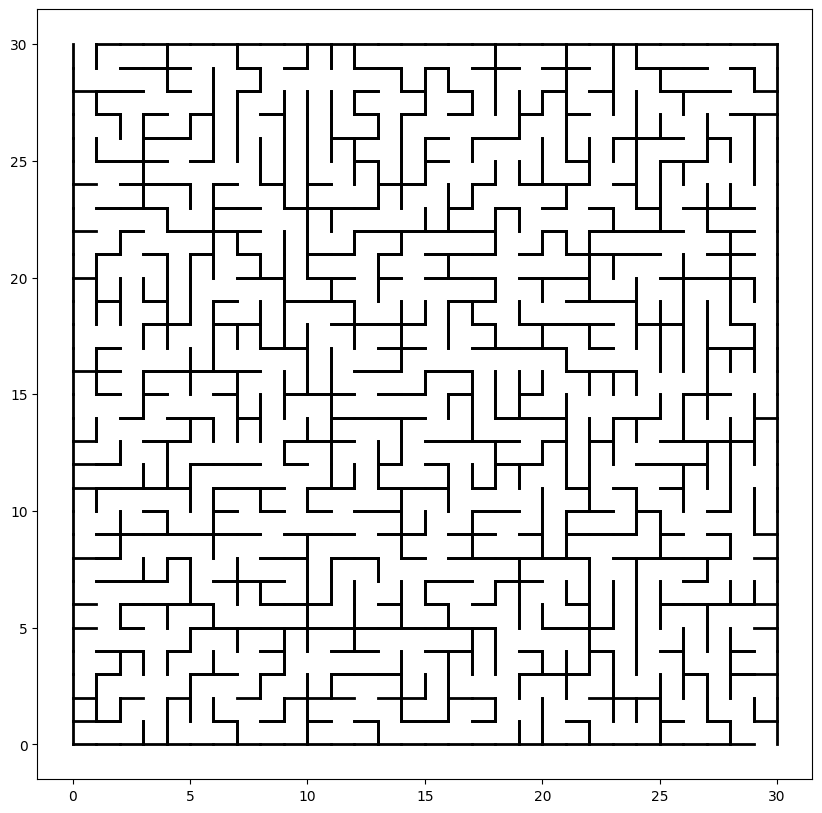

In [22]:
maze = generate_maze(N)
draw_maze(maze)